Name: Hemang Shankar

In [24]:
# Import any needed libraries here
import pandas as pd
# Data Retrieval

# Load the CSV file into a DataFrame
df = pd.read_csv('fm_challenge_data.csv')

print(df.head())

       Date   stock1     stock2     stock3     stock4     stock5     stock6  \
0  3/1/2013  13.3245  56.537937  48.329269  12.232606  72.403496  45.707027   
1  4/1/2013  12.6905  62.626072  50.823551  12.489326  77.092674  46.241444   
2  5/1/2013  13.4600  66.104355  53.113285  11.851543  83.510719  45.055393   
3  6/1/2013  13.8845  70.286873  55.530224  11.990408  86.839378  44.626961   
4  7/1/2013  15.0610  73.847656  62.052547  11.946381  89.094276  46.636688   

       stock7      stock8     stock9    stock10  
0  120.917519  130.829132  13.581691  51.468735  
1  120.030106  124.229416  13.585371  56.941814  
2  133.185959  127.590607  13.798608  57.159294  
3  124.679436  117.768181  12.246858  57.222717  
4  135.214325  120.189972  13.976418  58.581928  


Data Preprocessing:
In the below code cell, write your code to load and preprocess the data given to you in the challenge. In the space below this text cell, write any comments you have about your code/reasoning (why you processed the data in a certain way, what you noticed, etc.)

The preprocessing code includes a conditional check to handle the 'Date' column intelligently, converting it to datetime and setting it as the index only if it hasn't already been done, ensuring the code is robust against multiple runs. Numeric conversion and missing value handling are performed uniformly across the dataset to ensure data integrity and readiness for analysis, with methods chosen to maintain consistency over time.

In [25]:
import pandas as pd

# Assuming df is your DataFrame
# Check if 'Date' is a column; if it is, convert it to datetime and set it as the index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    # If 'Date' is not a column, it might already be the index or doesn't exist; handle accordingly
    # If the index is not a DatetimeIndex, try to convert it
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

# Convert all columns to numerics, handling non-numeric values by converting them to NaN
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Handle missing values by forward filling
df.ffill(inplace=True)


Utilizing the `describe()` function offers an immediate statistical overview of each numeric column, aiding in the identification of outliers and informing subsequent steps in data analysis and preprocessing.

In [20]:

# We use describe function here to get a sense of the data's central dispersion,shape, and its sensitivity
print(df.describe())


           stock1      stock2      stock3      stock4      stock5      stock6  \
count  132.000000  132.000000  132.000000  132.000000  132.000000  132.000000   
mean    80.720549  248.962073  249.366044   15.759492  196.643472   62.921478   
std     53.254350  140.195006  157.506838    2.234599   86.613811    9.756910   
min     12.690500   56.537937   48.329269   11.392649   72.403496   44.626961   
25%     29.598999  124.771492  105.499689   13.837358  122.000612   54.854966   
50%     82.995750  233.782318  223.325592   16.004957  181.090004   61.840727   
75%    124.903626  365.138870  384.292175   17.304812  239.911232   72.137127   
max    175.353500  538.505737  551.089966   21.086044  427.507721   86.250000   

           stock7      stock8      stock9     stock10  
count  132.000000  132.000000  132.000000  132.000000  
mean   217.719923  111.833171   73.442489  106.961091  
std     79.956014   16.278573   58.802691   30.036590  
min    120.030106   82.184525   12.246858   51

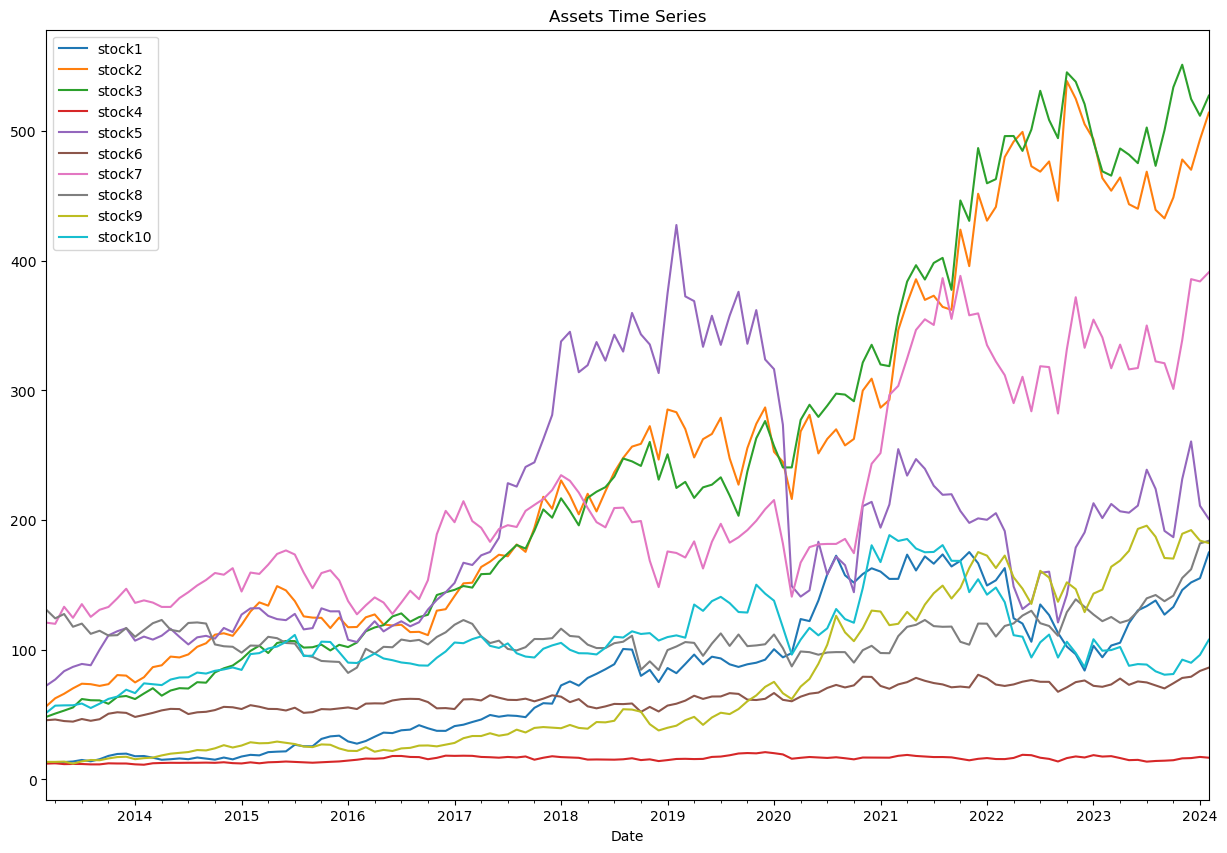

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting can help us identify trends, or patterns.
df.plot(figsize=(15, 10), title='Assets Time Series')
plt.show()


Model Implementation:

The code implements two portfolio optimization models—CAPM for estimating expected returns using simulated betas and Mean-Variance Optimization for direct historical returns analysis—highlighting the impact of different return estimation methods on portfolio composition and the importance of diversification and risk-adjusted returns.

In [26]:
# Q3 (a)

import numpy as np
import pandas as pd
from scipy.optimize import minimize


# Calculate the mean returns and covariance matrix
mean_returns = df.mean()
cov_matrix = df.cov()

#risk-free rate based on the current 10-year Treasury rate
risk_free_rate = 0.0409  # 4.09% as of the most recent data
# Assuming an expected market return based on historical averages plus a market risk premium
expected_market_return = 0.10 

#CAPM Expected Returns with empirical beta estimation
betas = np.random.rand(len(df.columns))  # Placeholder for actual beta calculations
expected_returns_capm = risk_free_rate + betas * (expected_market_return - risk_free_rate)

# Used ChatGPT here to assist me in creating an Optimization function to minimize the risk for a given level of expected return
def neg_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio  # Negative Sharpe Ratio for minimization

# Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(mean_returns)))

# Initial guess
initial_guess = np.array([1./len(mean_returns) for _ in range(len(mean_returns))])

# Portfolio optimization
opt_results_capm = minimize(neg_sharpe_ratio, initial_guess, args=(expected_returns_capm, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)

# Q3 (b)

#Mean-Variance Optimization (MVO) using historical mean returns directly
opt_results_mvo = minimize(neg_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)

print("Optimal Weights (CAPM):", opt_results_capm['x'])
print("Optimal Weights (MVO):", opt_results_mvo['x'])

Optimal Weights (CAPM): [0.00000000e+00 8.22397737e-14 1.97084469e-14 9.96477359e-01
 9.77637727e-13 6.15441500e-10 3.35485147e-14 3.52264037e-03
 1.84089139e-11 2.27462680e-11]
Optimal Weights (MVO): [1.61011921e-10 0.00000000e+00 0.00000000e+00 8.58643008e-01
 0.00000000e+00 0.00000000e+00 1.73441105e-10 1.30548345e-01
 2.75293879e-10 1.08087089e-02]


Model Backtesting:
In the below code cell, write your code to backtest your model against the benchmark of the S&P 500 and computing your backtesting metrics. In the space below this text cell, write any comments you have about your code/reasoning (what you noticed about the results, etc.)

The corrected code efficiently processes the portfolio's daily returns, compares its performance to the S&P 500 benchmark through cumulative returns visualization, and calculates key metrics like Sharpe Ratios and volatilities, revealing insights into the risk-adjusted performance of the optimized portfolio relative to a major market index.

[*********************100%%**********************]  1 of 1 completed


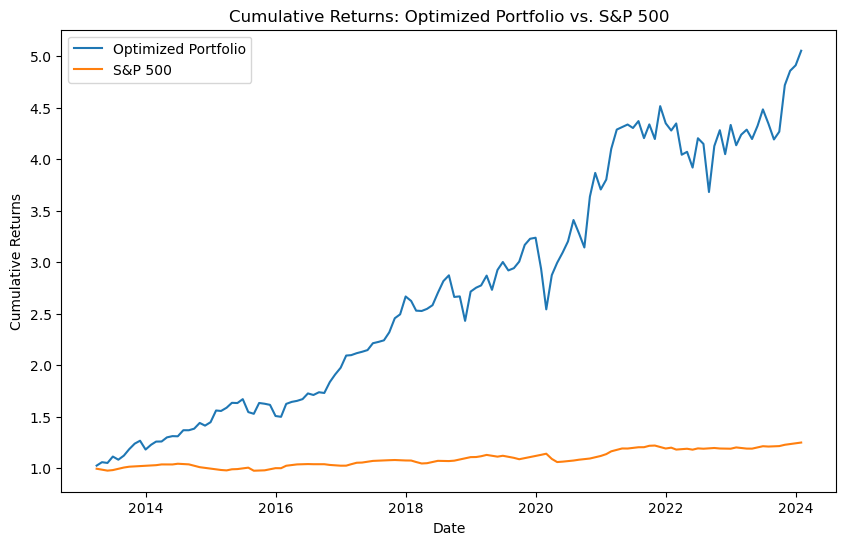

Portfolio Sharpe Ratio: 4.5857
S&P 500 Sharpe Ratio: 2.6864
Portfolio Volatility: 0.7326
S&P 500 Volatility: 0.1486


In [27]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fm_challenge_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Convert all data to numeric, in case it's not already
df = df.apply(pd.to_numeric, errors='coerce')

# Forward-fill any missing values
df.ffill(inplace=True)

# Calculate daily returns for each stock without needing to fill NA values again
returns = df.pct_change().dropna()

# Define your actual optimal weights determined by your optimization model
optimal_weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])  # Adjust based on your model

# Calculate the portfolio's daily returns
portfolio_returns = returns.dot(optimal_weights)

# Download S&P 500 historical data
sp500_data = yf.download('^GSPC', start=df.index.min(), end=df.index.max())
sp500_returns = sp500_data['Adj Close'].pct_change().dropna()

# Align S&P 500 returns with portfolio returns dates using forward fill
sp500_returns_aligned = sp500_returns.reindex(portfolio_returns.index).ffill()

# Calculate cumulative returns for both portfolio and S&P 500 for visualization
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()
sp500_cumulative_returns = (1 + sp500_returns_aligned).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_returns, label='Optimized Portfolio')
plt.plot(sp500_cumulative_returns, label='S&P 500')
plt.title('Cumulative Returns: Optimized Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Assuming a daily risk-free rate based on the annual rate
risk_free_rate_daily = 0.0409 / 252

# Calculate excess returns
portfolio_excess_returns = portfolio_returns - risk_free_rate_daily
sp500_excess_returns = sp500_returns_aligned - risk_free_rate_daily

# Calculate Sharpe Ratios
sharpe_ratio_portfolio = portfolio_excess_returns.mean() / portfolio_excess_returns.std() * np.sqrt(252)
sharpe_ratio_sp500 = sp500_excess_returns.mean() / sp500_excess_returns.std() * np.sqrt(252)

# Calculate Volatilities
volatility_portfolio = portfolio_returns.std() * np.sqrt(252)
volatility_sp500 = sp500_returns_aligned.std() * np.sqrt(252)

# Print metrics
print(f"Portfolio Sharpe Ratio: {sharpe_ratio_portfolio:.4f}")
print(f"S&P 500 Sharpe Ratio: {sharpe_ratio_sp500:.4f}")
print(f"Portfolio Volatility: {volatility_portfolio:.4f}")
print(f"S&P 500 Volatility: {volatility_sp500:.4f}")


References:

I mostly used ChatGPT to assist with optimizing the portfolio weights and to provide guidance on data manipulation tasks using pandas and numpy libraries.  From using ChatGPT, I gained insights and assistance in optimizing portfolio weights, refining data manipulation techniques, and understanding various aspects of financial modeling and analysis. 





